In [78]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
insercion=pd.read_csv("insercion.csv")

In [80]:
insercion.head(10)

,sexo,dirección,tamano_familia,relacion_padres,razon_carrera,acceso_internet,estado_salud,adiccion,apoyo_educativo,relacion_familiar,relacion_sentimental,hijos,trabaja,deserccion
0,0,0,4,0,0,1,4,0,0,4,0,1,0,1
1,1,0,4,1,1,0,4,2,0,2,0,1,0,0
2,1,1,7,1,1,1,0,1,1,0,0,0,0,0
3,0,0,9,0,1,0,4,3,0,2,1,1,1,1
4,0,1,8,1,1,0,3,3,0,3,1,0,0,0
5,0,0,9,1,1,1,3,3,1,4,1,0,1,1
6,0,1,6,0,2,1,0,2,1,0,1,1,1,0
7,0,1,12,1,2,0,4,1,0,3,1,0,0,1
8,1,0,10,0,1,1,1,0,0,3,0,1,1,1
9,0,0,8,1,0,0,1,1,1,4,0,1,1,1


In [81]:
insercion.shape

(200, 14)

In [82]:
insercion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   sexo                  200 non-null    int64
 1   dirección             200 non-null    int64
 2   tamano_familia        200 non-null    int64
 3   relacion_padres       200 non-null    int64
 4   razon_carrera         200 non-null    int64
 5   acceso_internet       200 non-null    int64
 6   estado_salud          200 non-null    int64
 7   adiccion              200 non-null    int64
 8   apoyo_educativo       200 non-null    int64
 9   relacion_familiar     200 non-null    int64
 10  relacion_sentimental  200 non-null    int64
 11  hijos                 200 non-null    int64
 12  trabaja               200 non-null    int64
 13  deserccion            200 non-null    int64
dtypes: int64(14)
memory usage: 22.0 KB


Si hay varias características y muchas de ellas están altamente correlacionadas, entonces entrenar un algoritmo con todas las características reducirá la precisión. Por lo tanto, la selección de características debe realizarse con cuidado. Este conjunto de datos tiene menos características, pero aún veremos la correlación

In [83]:
plt.figure(figsize=(7,8)) 

<Figure size 504x576 with 0 Axes>

<Figure size 504x576 with 0 Axes>

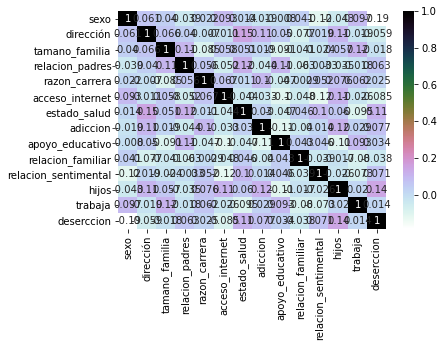

In [84]:
sns.heatmap(insercion.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()
 

In [85]:

insercion_adiccion = pd.crosstab(index=insercion["deserccion"], columns=insercion["adiccion"])

insercion_adiccion


adiccion,0,1,2,3
deserccion,,,,
0,22,34,28,25
1,18,20,26,27


In [86]:
insercion_apoyo_educativo = pd.crosstab(index=insercion["deserccion"],
                           columns=insercion["apoyo_educativo"])
insercion_apoyo_educativo

apoyo_educativo,0,1
deserccion,,
0,54,55
1,42,49


In [87]:
insercion_sexo = pd.crosstab(index=insercion["deserccion"],
                           columns=insercion["sexo"])
insercion_sexo

sexo,0,1
deserccion,,
0,48,61
1,57,34


In [88]:
insercion_razon_carrera = pd.crosstab(index=insercion["deserccion"],
                           columns=insercion["razon_carrera"])
insercion_razon_carrera

razon_carrera,0,1,2
deserccion,,,
0,29,48,32
1,27,31,33


C:\Users\a\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\a\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


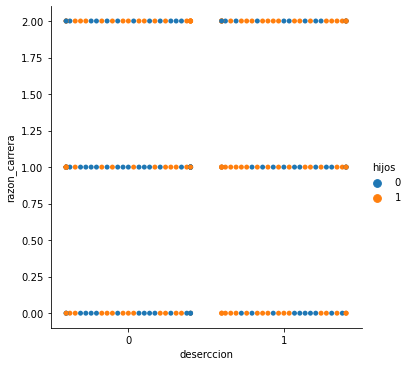

In [89]:
sns.catplot(y="razon_carrera", x="deserccion", hue="hijos", data=insercion,kind="swarm");
plt.show()

<AxesSubplot:title={'center':'deserccion de los estudiantes univercitarios'}>

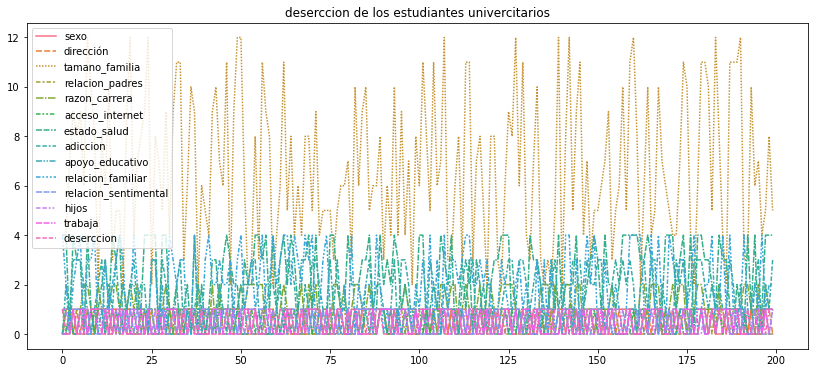

In [90]:
plt.figure(figsize=(14,6))

# Add title
plt.title("deserccion de los estudiantes univercitarios")

# Line chart showing daily global streams of each song 
sns.lineplot(data=insercion)


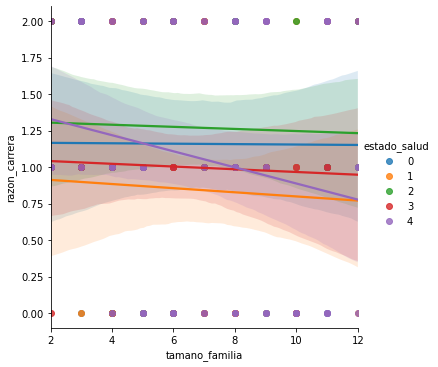

In [91]:
sns.lmplot(x="tamano_familia", y="razon_carrera", hue="estado_salud", data=insercion)

<AxesSubplot:xlabel='razon_carrera', ylabel='tamano_familia'>

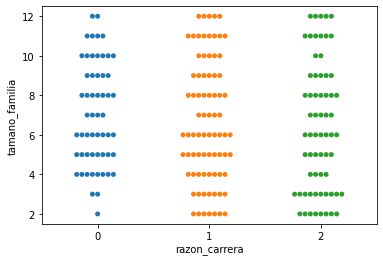

In [92]:
sns.swarmplot(x=insercion['razon_carrera'],
              y=insercion['tamano_familia'])


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 

entrenando datos de deserccion

In [94]:
train, test = train_test_split(insercion, test_size = 0.3)
print(train.shape)
print(test.shape)

(140, 14)
(60, 14)


In [102]:
train_X = train[['tamano_familia','razon_carrera','estado_salud','acceso_internet']]# taking the training data features
train_y=train.deserccion
train_X.head(2)

,tamano_familia,razon_carrera,estado_salud,acceso_internet
77,5,2,2,1
98,2,1,0,0


In [103]:
test_X= test[['tamano_familia','razon_carrera','estado_salud','acceso_internet']] # taking test data features
test_y =test.deserccion   
test_X.head(2)

,tamano_familia,razon_carrera,estado_salud,acceso_internet
19,12,2,2,0
119,2,2,2,0


In [104]:
train_y.head() 

77     1
98     0
113    0
174    0
96     0
Name: deserccion, dtype: int64

In [105]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y)) #now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.4166666666666667


In [106]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.4666666666666667


In [107]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.5166666666666667


In [108]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.4666666666666667
